# Task 1- Prediction Using Supervised ML (Level- Beginner)
  Author -  Archana Soni
  
  
 In this task we will predict the percentage of an Student based on the no. of Study hours. this is a simple linear regression
 task as it involve just 2 variables.

# Importing Packages

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Getting the data from an online source

In [3]:
dataset = pd.read_csv("http://bit.ly/w-data")

# Exploring Data

In [4]:
dataset.head()


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [6]:
print(dataset.shape)

(25, 2)


last 5 Record of the dataset

In [7]:
dataset.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [8]:
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


# Data Visualization 

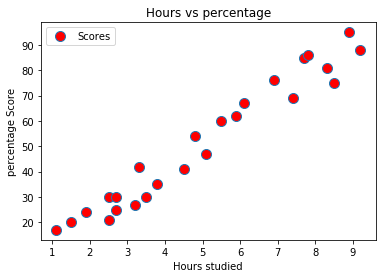

In [10]:
# Ploting the distribution of Scores
dataset.plot(x='Hours',y='Scores',style='o',markersize=10,markerfacecolor='red',)
plt.title('Hours vs percentage')
plt.xlabel('Hours studied')
plt.ylabel('percentage Score')
plt.show()

# Preparing the data for Machine learning 

In [11]:
x=dataset.iloc[:,:-1].values
y=dataset.iloc[:,1].values

# train test split

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

# Simple linear regression model on the training set

In [13]:
from sklearn.linear_model import LinearRegression  


In [14]:
regressor=LinearRegression()
regressor.fit(x_train, y_train)

print ("training Complete")

training Complete


# Displaying the intercept and coeffiecient and plotting the regression line

In [15]:
print('intercept:',regressor.intercept_)
print('coefficient:',regressor.coef_)

intercept: 2.018160041434683
coefficient: [9.91065648]


In [16]:
# plotting the regression line
line=regressor.coef_*x+regressor.intercept_

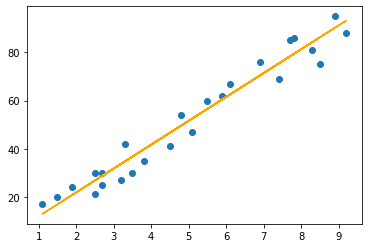

In [17]:
#plotting  for test data
plt.scatter(x,y)
plt.plot(x,line,color='orange');
plt.show()

# Making the Prediction

In [18]:
print(x_test)  #testing data - In hours
y_pred =regressor.predict(x_test)  # predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


# comparing Actual vs Predicted Value

In [19]:
df= pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


# visualising the Training set Results

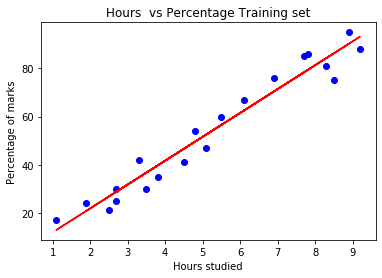

In [20]:
plt.scatter(x_train,y_train, color='blue')
plt.plot(x_train,regressor.predict(x_train),color='red')
plt.title('Hours  vs Percentage Training set')
plt.xlabel('Hours studied')
plt.ylabel('Percentage of marks')
plt.show()

# Error metrics

In [21]:
from sklearn import metrics

In [22]:
print('mean Absolute Error:',metrics.mean_absolute_error(y_test,y_pred))

mean Absolute Error: 4.183859899002975


# predicting score of the student who studies for 9.25 hours/day

In [24]:
hours=9.25
val=np.array([hours])
val=val.reshape(-1,1)
own_pred=regressor.predict(val)
print('for 9.25 hours predicted score={}'.format(own_pred[0]))

for 9.25 hours predicted score=93.69173248737538


# conclusion

According to the linear regression modelthe student who studies for 9.25 hours/day will score 93.69